# Executor
### Use to take measurements

In [1]:
import nidaqmx
from nidaqmx import Task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DAQ
from data_structures import experiment

# Live plots
import matplotlib
%matplotlib notebook
import IPython
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 40em; width:60em}</style>"))

# Electrochemical Impedance Spectroscopy

In [2]:
'''=========================USER INPUTS========================================'''
E_DC = 0 # DC potential in V
E_AC = 0.010 # AC perturbation in V
low_freq = 1 # Lower limit of frequencies to be measured in Hz

Rm = 1000 # Rm resistance in Ohms
Cm = 0 # Cm capacitance in Farads

<IPython.core.display.Javascript object>


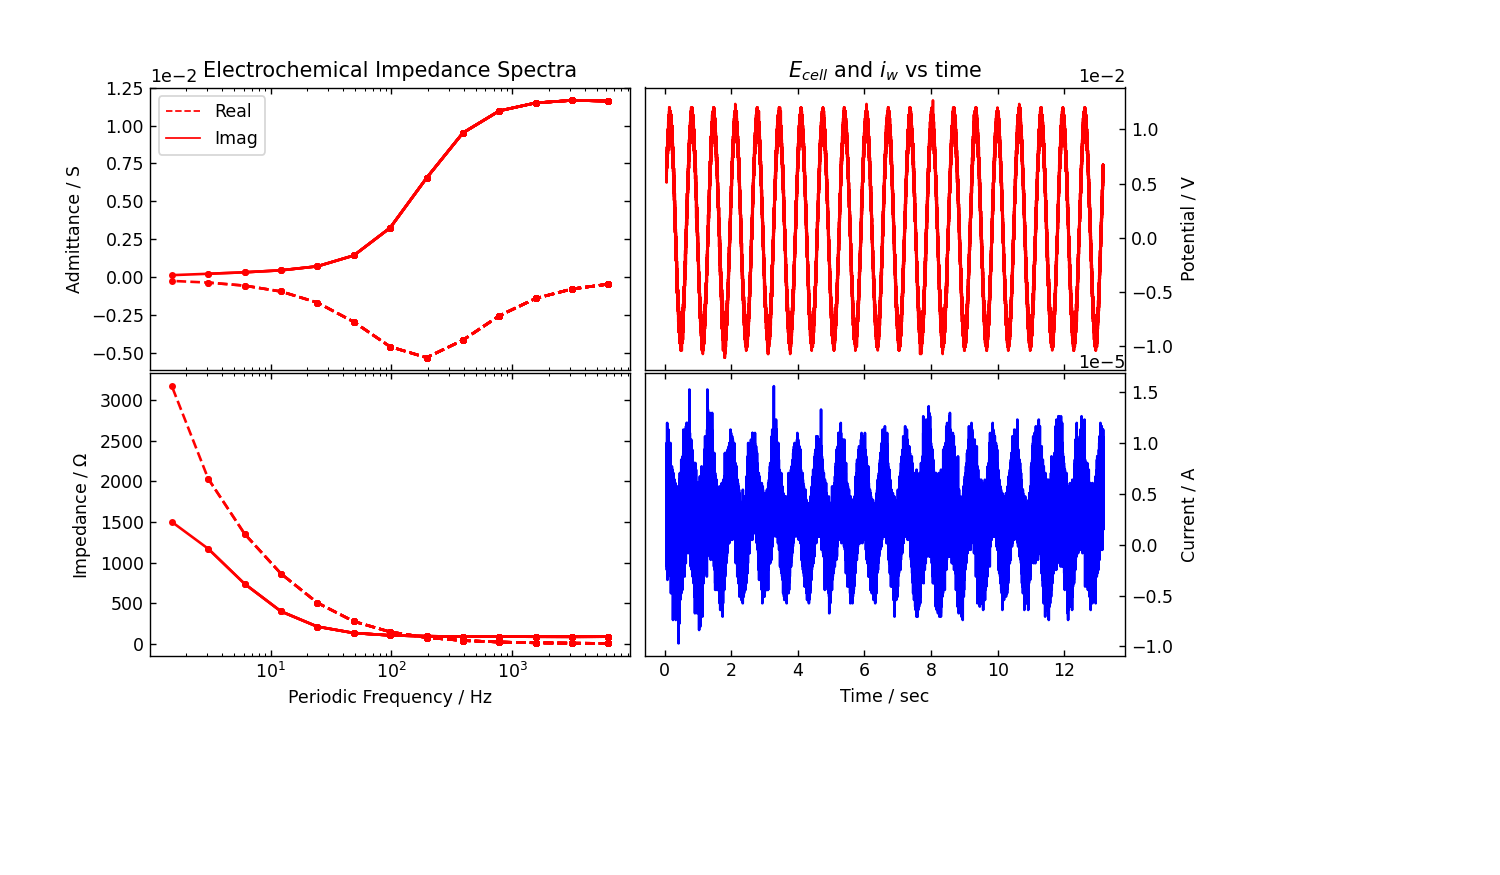

<IPython.core.display.Javascript object>


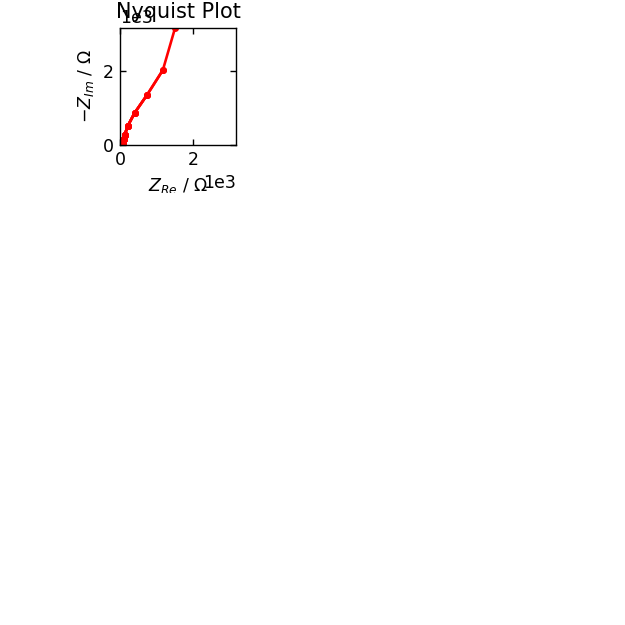

EIS_TBAF_Au_MeCN_P-04-02


In [8]:
data_EIS, params_EIS, opt_EIS = DAQ.take_EIS(E_DC, E_AC, low_freq, Rm, Cm)
latest_EIS = experiment(data_EIS, params_EIS)

analyte = 'TBAF_'
electrode = 'Au_'
solvent = 'MeCN_'
notebook = 'P-04-02'
dirname = 'EIS_'+analyte+electrode+solvent+notebook
print(dirname)
latest_EIS.to_csv(dirname=dirname)

##### Save data

In [9]:
analyte = 'TBAF_'
electrode = 'Au_'
solvent = 'MeCN_'
notebook = 'P-04-02'
dirname = 'EIS_'+analyte+electrode+solvent+notebook
print(dirname)
latest_EIS.to_csv(dirname=dirname)

EIS_TBAF_Au_MeCN_P-04-02


# Cyclic Voltammetry

<IPython.core.display.Javascript object>


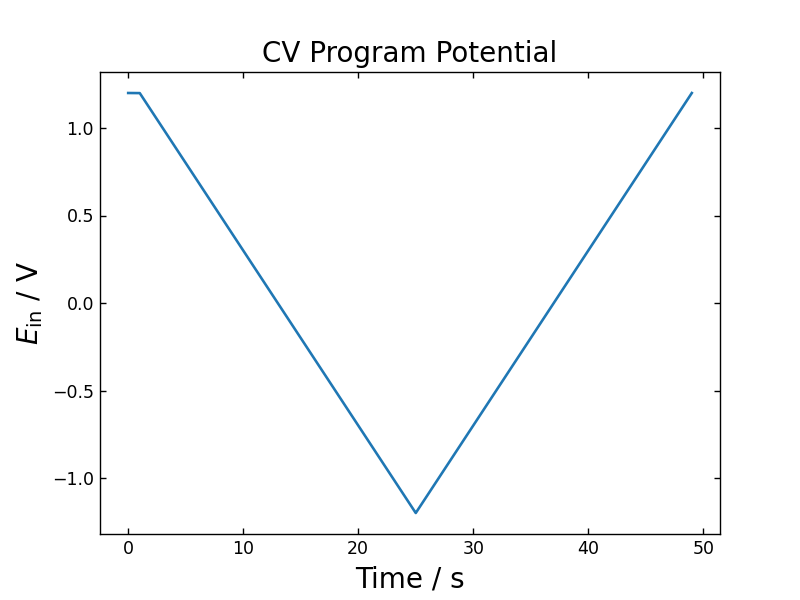

In [10]:
'''=========================USER INPUTS========================================'''
samp_rate = 3600 # sampling rate (samples/s) Use an integral multiple of 120/s and at least 3600 per volt
scan_rate = .1 # scan rate (V/s)
Rm = 1000 # Rm resistance in Ohms
Cm = 1.0e6 # Cm capacitance in Farads
# buffer_size = 3600 # passed as a default argument, but changeable.

'''Set up potential profile'''
h_time = 1  # hold time before sweep in seconds
# potential bounds for each section
f_start_pot = 1.2# Initial potential
f_end_pot = -1.2   # Vertex potential

pot_profile, samp_num_tot, scan_rate = DAQ.CV_potential_profile(f_start_pot, f_end_pot, samp_rate, scan_rate, h_time)

<IPython.core.display.Javascript object>


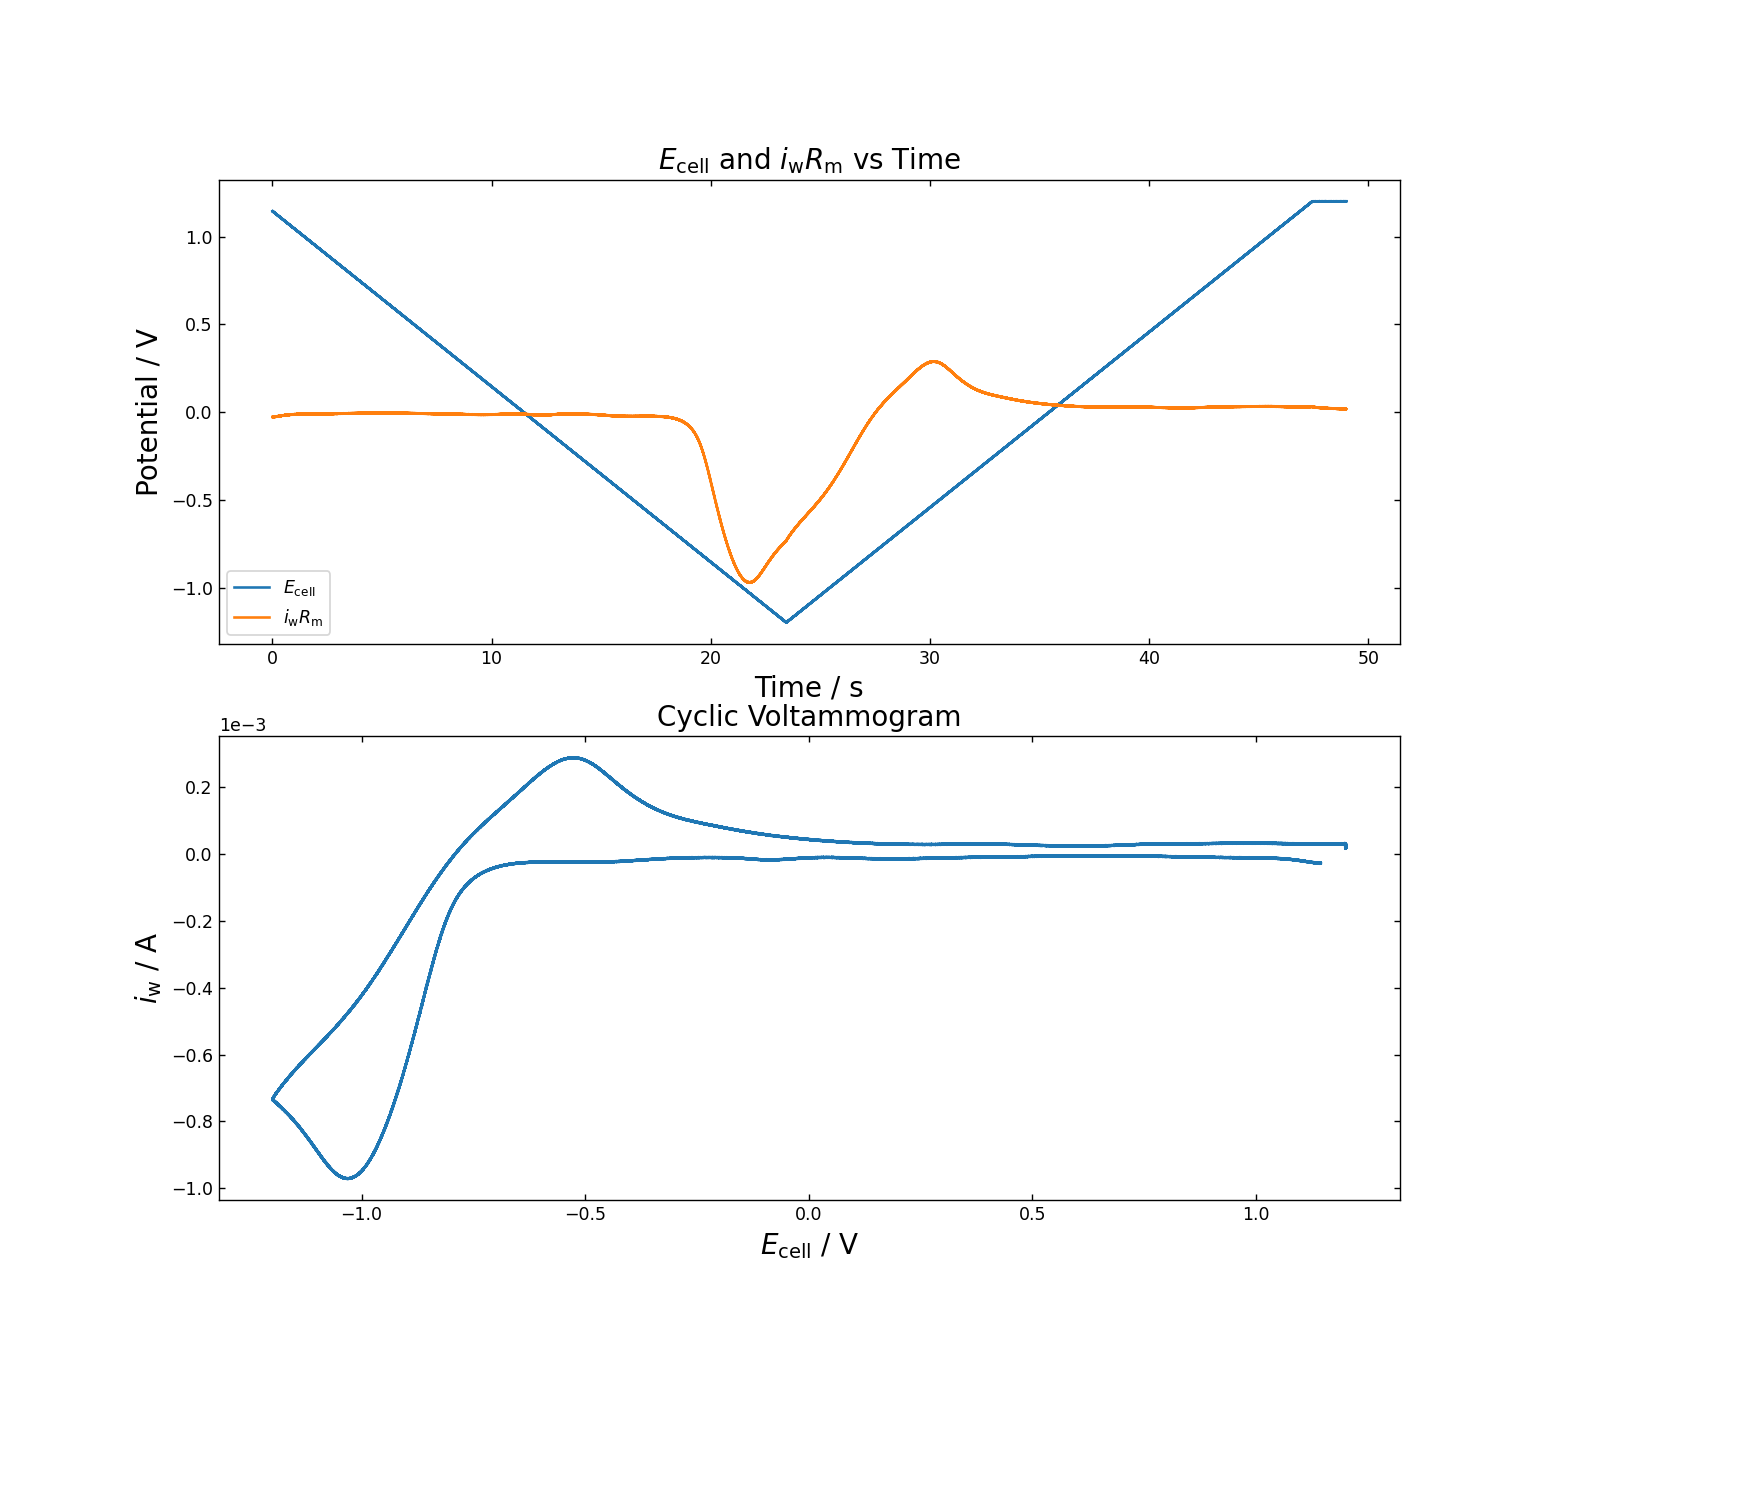

Must press Enter to end execution of code block


In [11]:
data_CV, params_CV = DAQ.take_CV(pot_profile, samp_num_tot, scan_rate, Rm, Cm)
latest_CV = experiment(data_CV, params_CV)

##### Save data

In [ ]:
analyte = 'TBAF_'
electrode = 'Au_'
solvent = 'MeCN_'
notebook = 'P-04-04'

dirname = 'CV_'+analyte+electrode+solvent+str(latest_CV.params.loc[latest_CV.params['parameter']=='scan_rate', 'value'].item()) + 'Vs-1_'+notebook
print(dirname)
latest_CV.to_csv(dirname=dirname)

CV_TBAF_Au_MeCN_0.1Vs-1_P-04-04


# Potential Step Chronoamperometry

In [ ]:
'''=========================USER INPUTS========================================'''
# samp_rate = 3600 # sampling rate (samples/s) Use an integral multiple of 120/s and at least 3600 per volt. Passed as default argument, but changable.
# buffer_size = 3600 # passed as a default argument, but changeable.
Rm = 1000 # Rm resistance in Ohms
Cm = 1.0e6 # Cm capacitance in Farads

'''Set up potential profile'''
pot_init = 0
pot_step = 0
pot_rest = 0
pot_init_time = 0
pot_step_time = 0
pot_rest_time = 0

pot_profile, samp_num_tot = DAQ.CA_potential_profile(pot_init, pot_step, pot_rest,
                                                     pot_init_time, pot_step_time, pot_rest_time)

In [ ]:
data_CA, params_CA = DAQ.take_CA(pot_profile, samp_num_tot, Rm, Cm)
latest_CA = experiment(data_CA, params_CA)

##### Save Data

In [ ]:
analyte = 'Feacac_'
electrode = 'GC_'
solvent = 'MeCN_'
notebook = 'P-03-03'

dirname = 'CA_'+analyte+electrode+solvent+str(pot_init)+'V-'+str(pot_step)+'V_'+notebook
print(dirname)
latest_CA.to_csv(dirname=dirname)